# Stochastic Processes: <br>Data Analysis and Computer Simulation
<br>


# Brownian motion 3: data analysis
<br>


# 1. Distribution and time correlation
<br>

# 1.1. Generate trajectories

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
dim  = 3    # system dimension (x,y,z)
nump = 1000 # number of independent Brownian particles to simulate 
nums = 1024 # number of simulation steps
dt   = 0.05 # set time increment, \Delta t
zeta = 1.0  # set friction constant, \zeta
m    = 1.0  # set particle mass, m
kBT  = 1.0  # set temperatute, k_B T
std  = np.sqrt(2*kBT*zeta*dt) # calculate std for \Delta W via Eq.(F11)
np.random.seed(0) # initialize random number generator with a seed=0
R = np.zeros([nump,dim]) # array to store current positions and set initial condition Eq.(F12)
V = np.zeros([nump,dim]) # array to store current velocities and set initial condition Eq.(F12)
W = np.zeros([nump,dim]) # array to store current random forcces
Rs = np.zeros([nums,nump,dim]) # array to store positions at all steps
Vs = np.zeros([nums,nump,dim]) # array to store velocities at all steps
Ws = np.zeros([nums,nump,dim]) # array to store random forces at all steps
time = np.zeros([nums]) # an array to store time at all steps
for i in range(nums): # repeat the following operations from i=0 to nums-1
    W = std*np.random.randn(nump,dim) # generate an array of random forces according to Eqs.(F10) and (F11)
    V = V*(1-zeta/m*dt)+W/m # update velocity via Eq.(F9)
    R = R + V*dt # update position via Eq.(F5)
    Rs[i]=R # accumulate particle positions at each step in an array Rs
    Vs[i]=V # accumulate particle velocitys at each step in an array Vs
    Ws[i]=W # accumulate random forces at each step in an array Ws
    time[i]=i*dt # store time in each step in an array time

# 1.2. Analysis 1

## Position $R$ vs. time $t$ for all particles 

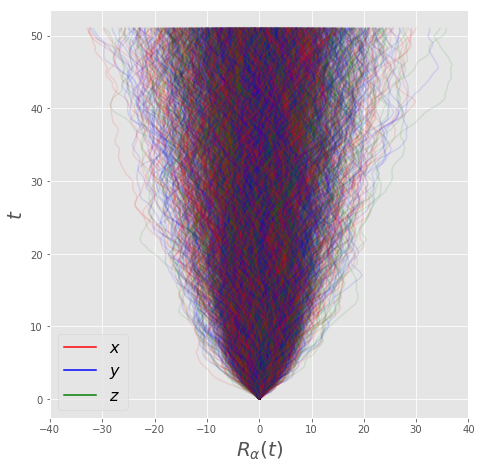

In [2]:
# particle positions vs time
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$R_{\alpha}(t)$", fontsize=20)
ax.set_ylabel(r"$t$", fontsize=20)
ax.set_xlim(-40,40)
ts = 10 # only draw every 10 points to make it faster
for n in range(nump):
    lx, = ax.plot(Rs[::ts,n,0],time[::ts],'r', alpha=0.1)
    ly, = ax.plot(Rs[::ts,n,1],time[::ts],'b', alpha=0.1)
    lz, = ax.plot(Rs[::ts,n,2],time[::ts],'g', alpha=0.1)
# add plot legend for last x,y,z lines and remove alpha from legend lines
leg = ax.legend([lx,ly,lz], [r"$x$",r"$y$",r"$z$"],loc=0, fontsize=16)
for l in leg.get_lines():
    l.set_alpha(1)
plt.show()

## Distribution of the particle position (theoretical results)

- Calculate the distribution functions for $R_\alpha$ ($\alpha = x,y,z$) at $t=t_{\rm end}(=$ `nums`$\times\Delta t$), and compare them with the following theoretical result (see the supplemental note for the derivation).

$$
P(R_{\alpha})=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{\left(R_{\alpha}-\langle R_{\alpha}\rangle\right)^2}{2\sigma^2}\right]\qquad\qquad(\alpha=x,y,z)
\tag{G1}
$$

$$
\langle R_{\alpha}\rangle=0,\ \ \ \ \ 
\sigma^2=\frac{2k_BTt_{\rm end}}{\zeta}\tag{G2, G3}
$$


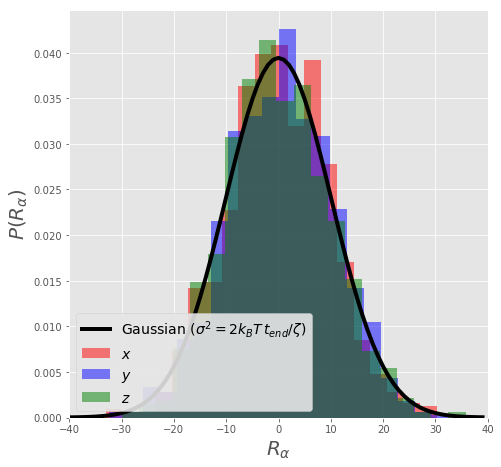

In [3]:
# positional distribution of particles at the end of the simulation
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$R_{\alpha}}(t=t_\mathrm{end})$", fontsize=20)
ax.set_ylabel(r"$P(R_{\alpha})$", fontsize=20)
# plot simulation histograms
ax.hist(Rs[-1,:,0], bins=20,normed=True,color='r',alpha=0.5,lw=0,label=r"$x$")
ax.hist(Rs[-1,:,1], bins=20,normed=True,color='b',alpha=0.5,lw=0,label=r"$y$")
ax.hist(Rs[-1,:,2], bins=20,normed=True,color='g',alpha=0.5,lw=0,label=r"$z$")
# plot theoretical gaussian distribution
sig2=2*kBT/zeta*dt*nums
ave=0.0
x = np.arange(-40,40,1)
y = np.exp(-(x-ave)**2/2/sig2)/np.sqrt(2*np.pi*sig2)
ax.plot(x,y,lw=4,color='k',label=r"Gaussian $(\sigma^2=2k_BT\,t_{end}/\zeta)$")
ax.legend(fontsize=14,loc=3, framealpha=0.9)
ax.set_xlim(-40,40)
plt.show()

## Velocity $V$ vs. time $t$ for all particles

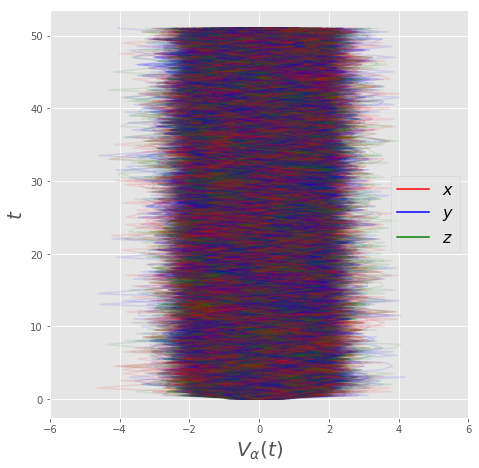

In [4]:
# particle velocities vs time
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$V_{\alpha}(t)$", fontsize=20)
ax.set_ylabel(r"$t$", fontsize=20)
ts = 10 # only draw every 10 points to make it faster
for n in range(nump):
    lx, = ax.plot(Vs[::ts,n,0],time[::ts],'r', alpha=0.1)
    ly, = ax.plot(Vs[::ts,n,1],time[::ts],'b', alpha=0.1)
    lz, = ax.plot(Vs[::ts,n,2],time[::ts],'g', alpha=0.1)
ax.set_xlim(-6, 6)
# add plot legend for last x,y,z lines and remove alpha from legend lines
leg = ax.legend([lx,ly,lz], [r"$x$",r"$y$",r"$z$"],loc=0, fontsize=16)
for l in leg.get_lines():
    l.set_alpha(1)
plt.show()

## Distribution of the particle velocity (c.f. Maxwell-Boltzmann distribution)

- Calculate the distribution functions for $V_\alpha$ ($\alpha=x,y,z$) for $t_{\rm end}/2\le t\le t_{\rm end}$, and compare them with the theoretical Maxwell-Boltzmann distribution function given below

$$
P(V_{\alpha})=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{\left(V_{\alpha}-\langle V_{\alpha}\rangle\right)^2}{2\sigma^2}\right]\ \ \ \ \ (\alpha=x,y,z)
\tag{G4}
$$

$$
\langle V_{\alpha}\rangle=0,\ \ \ \ \ 
\sigma^2=\frac{2k_BT}{m}\tag{G5, G6}
$$

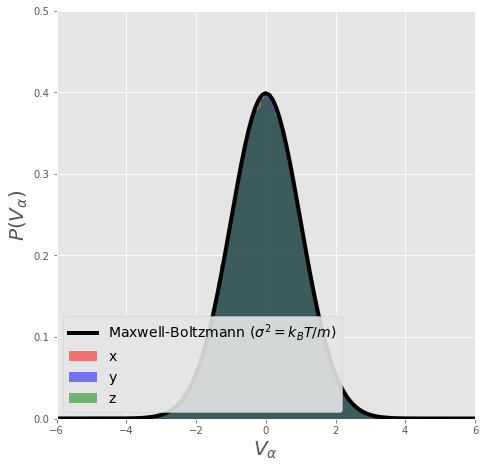

In [5]:
# velocity distribution of particles at the end of the simulation
fig, ax = plt.subplots(figsize=(7.5,7.5))
# Compute histogram of velocities using the last half of the trajectory data
# Note: flatten is required to transform the 2d array into a 1d array
ax.hist(Vs[nums//2:,:,0].flatten(),bins=100,normed=True,alpha=0.5,lw=0,color='r',label="x")
ax.hist(Vs[nums//2:,:,1].flatten(),bins=100,normed=True,alpha=0.5,lw=0,color='b',label="y")
ax.hist(Vs[nums//2:,:,2].flatten(),bins=100,normed=True,alpha=0.5,lw=0,color='g',label="z")
# Draw theoretical gaussian distribution
sig2=kBT/m
ave=0.0
x = np.arange(-10,10,0.1)
y = np.exp(-(x-ave)**2/2/sig2)/np.sqrt(2*np.pi*sig2)
ax.plot(x,y,lw=4,color='k',label=r"Maxwell-Boltzmann $(\sigma^2=k_BT/m)$")
ax.set_xlabel(r"$V_{\alpha}$",fontsize=20)
ax.set_ylabel(r"$P(V_{\alpha})$", fontsize=20)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 0.5)
ax.legend(fontsize=14, loc=3,framealpha=0.9)
plt.show()

# 1.3. Analysis 2

## Velocity auto-correlation function

- Calculate the velocity auto-correlation function, and compare it with the following theoretical result (see the derivation for Eq.(26)).

$$
\varphi_V(t)=\langle\mathbf{V}(t)\cdot \mathbf{V}(0)\rangle
=\langle V_x(t) V_x(0)\rangle  + \langle V_y(t) V_y(0)\rangle  + \langle V_z(t) V_z(0)\rangle
$$

$$
= \frac{3k_BT}{m}\exp\left[-\frac{\zeta}{m}t\right]\tag{G7}
$$

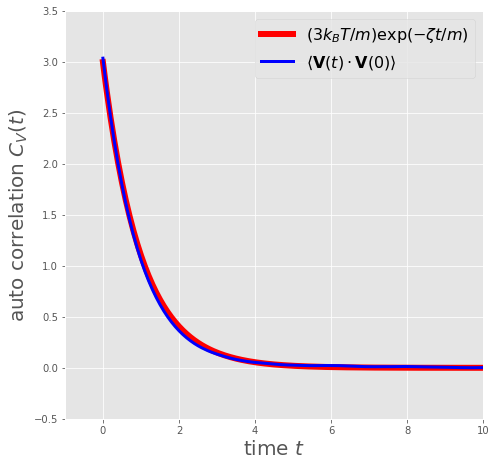

In [6]:
# compute self-correlation of vector v
def auto_correlate(v):
    # np.correlate computes C_{v}[k] = sum_n v[n+k] * v[n]
    corr = np.correlate(v,v,mode="full") # correlate returns even array [0:2*nums-1] centered at nums-1
    return corr[len(v)-1:]/len(v) # take positive values and normalize by number of points
corr = np.zeros([nums])
for n in range(nump):
    for d in range(dim):
        corr = corr + auto_correlate(Vs[:,n,d]) # correlation of d-component of velocity for particle n
corr=corr/nump #average over all particles
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.plot(time,dim*kBT/m*np.exp(-zeta/m*time),'r',lw=6, label=r'$(3k_BT/m)\exp(-\zeta t/m)$')
ax.plot(time,corr,'b',lw=3,label=r'$\langle\mathbf{V}(t)\cdot \mathbf{V}(0)\rangle$')
ax.set_xlabel(r"time $t$", fontsize=20)
ax.set_ylabel(r"auto correlation $C_V(t)$", fontsize=20)
ax.set_xlim(-1,10)
ax.set_ylim(-0.5,3.5)
ax.legend(fontsize=16)
plt.show()

## Power spectrum of particle velocity

- Calculate the power spectrum of the particle velocity, and compare it with the following theoretical result (see the derivation for Eq.(25))

$$
S_V(\omega)=\lim_{\tau\rightarrow \infty}\frac{1}{\tau}\lvert\mathbf{V}_\tau(\omega)\rvert^2=\frac{6 k_BT}{m}\frac{\gamma_c}{\omega^2+\gamma_c^2}
\tag{G8}
$$
where $\gamma_c = \zeta / m$ is the decay constant in Eq.(G7) and

$$
\mathbf{V}_{\tau}(\omega) = \int_{0}^{\tau} \mathrm{d}t\, \mathbf{V}(t) e^{i\omega t}\tag{G9}
$$
[](-\tau/2 - \tau/2 -> 0 - \tau)

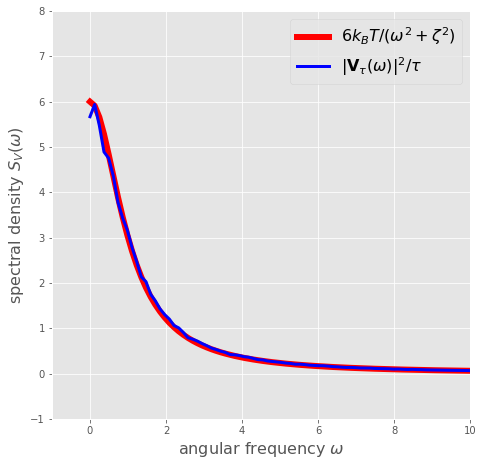

In [7]:
# return power spectrum for positive frequencies of even signal v
from numpy import fft
def psd(v,dt):  
    vw = fft.fft(v)*dt # V(w) with zero-frequency component at vw(0)
    return np.abs(vw[:nums//2])**2/(nums*dt) # S_V for w > 0 (Eq. (G9))
Sw   = np.zeros([nums//2])
for n in range(nump):
    for d in range(dim):
        Sw = Sw + psd(Vs[:,n,d],dt) # power spectrum of d-component of velocity for particle n
Sw = Sw/nump
fig, ax = plt.subplots(figsize=(7.5,7.5))
gamma = zeta/m
omega = fft.fftfreq(nums,d=dt)[:nums//2]*2.0*np.pi
ax.plot(omega,(6.0*kBT/m)*gamma/(omega**2 + gamma**2),'r',lw=6,label=r'$6k_BT/(\omega^2+\zeta^2)$')                         
ax.plot(omega,Sw,'b',lw=3,label=r'$|\mathbf{V}_\tau(\omega)|^2 / \tau$')
ax.set_xlabel(r"angular frequency $\omega$", fontsize=16)
ax.set_ylabel(r"spectral density $S_V(\omega)$", fontsize=16)
ax.legend(fontsize=16)
plt.xlim(-1, 10)
plt.ylim(-1, 8)
plt.show()